<a href="https://colab.research.google.com/github/Mansoldo/mod13_data_wrangling_brazil/blob/main/mod13_data_wrangling_brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto do Módulo 13 - Data Wrangling - EBAC

Trabalhar com dados geográficos, demográficos e econômicos do brasil.
Vamos manipular, e combinar dados de duas bases distintas para responder algumas perguntas de negócio.

O primeiro arquivo será o **estados-bruto.xml** que contém informações sobre estados (nome, sigla e região).

Segue abaixo a estrutura do arquivo:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Faremos uso do pacote 'beautifulsoup4' para extrair os dados do arquivo providenciado, e posteriormente salvar os dados extraídos em um novo arquivo 'estados-limpos.csv' seguindo a seguinte estrutura:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

# 1.0 - Leitura e tratamento

## 1.1 - Estados

In [88]:
# importando os pacotes BeautifulSoup e CSV
from bs4 import BeautifulSoup
import csv

In [89]:
# Abrir e ler o arquivo XML
with open ('estados-bruto.xml', 'r', encoding = 'utf8') as arquivo:
  conteudo = arquivo.read()

In [90]:
# Realizando o parse do XML
soup = BeautifulSoup(conteudo, 'xml')

In [91]:
# Criando a estrutura de armazenamento
dados = []

In [92]:
# Iterar sobre cada elemento de ESTADO e coletando os valores de Nome, Sigla e Região
for estado in soup.find_all('ESTADO'):
  nome = estado.find('NOME').text.strip()
  sigla = estado.find('SIGLA').text.strip()
  regiao = estado.find('REGIAO').text.strip()

  # Armazenando
  dados.append([nome, sigla, regiao])

In [93]:
# Conferindo os dados
for estado in dados:
  print(estado)

['ACRE', 'AC', 'NORTE']
['ALAGOAS', 'AL', 'NORDESTE']
['AMAPA', 'AP', 'NORTE']
['AMAZONAS', 'AM', 'NORTE']
['BAHIA', 'BA', 'NORDESTE']
['CEARA', 'CE', 'NORDESTE']
['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE']
['ESPIRITO SANTO', 'ES', 'SUDESTE']
['GOIAS', 'GO', 'CENTRO-OESTE']
['MARANHAO', 'MA', 'NORDESTE']
['MATO GROSSO', 'MT', 'CENTRO-OESTE']
['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE']
['PARA', 'PA', 'NORTE']
['PARAIBA', 'PB', 'NORDESTE']
['PARANA', 'PR', 'SUL']
['PERNAMBUCO', 'PE', 'NORDESTE']
['PIAUI', 'PI', 'NORDESTE']
['RIO DE JANEIRO', 'RJ', 'SUDESTE']
['RIO GRANDE DO NORTE', 'RN', 'NORDESTE']
['RIO GRANDE DO SUL', 'RS', 'SUL']
['RONDONIA', 'RO', 'NORTE']
['RORAIMA', 'RR', 'NORTE']
['SANTA CATARINA', 'SC', 'SUL']
['SAO PAULO', 'SP', 'SUDESTE']
['SERGIPE', 'SE', 'NORDESTE']
['TOCANTINS', 'TO', 'NORTE']
['MINAS GERAIS', 'MG', 'SUDESTE']


In [94]:
# Salvando os dados num arquivo CSV
with open('estados-limpos.csv', 'w', newline='', encoding = 'utf8') as arquivo_csv:
  writer = csv.writer(arquivo_csv)
  writer.writerow(['estado', 'sigla', 'regiao'])
  writer.writerows(dados)

print('Arquivo "estados-limpos.csv" criado com sucesso!')

Arquivo "estados-limpos.csv" criado com sucesso!


## 1.2 - Cidades

Nesta etapa, vamos trabalhar com o arquivo "cidades-bruto.csv" onde vamos extrais os seguintes dados:

1.   Apenas dados do censo de 2010:
2.   Apenas as colunas UF, nome, PIB, Pop_est_2009 e PIB_percapita.

Depois, salvaremos os dados extraídos num arquivo chamado "cidades-limpas.csv".

In [95]:
# Importando o pacote Pandas e unicodedata
import pandas as pd
import unicodedata

In [96]:
def remover_acentos(texto):
    return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')

In [97]:
# Lendo o arquivo
df = pd.read_csv('cidades-bruto.csv', sep = ',')

In [98]:
# Consultando o df criado
df.head(2)

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,57883.992188,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,45723.875000,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...


In [99]:
# Filtrando para coletar os dados apenas de 2010 e criando uma cópia para que seja realizado o tratamento de acentos mais à frente
df_censo_2010 = df[df['Censo'] == 2010].copy()

In [100]:
# Selecionando as colunas desejadas
colunas_selecionado = ['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']
df_limpo = df_censo_2010[colunas_selecionado].copy()

In [101]:
# Remover acentos da coluna UF
df_limpo['UF'] = df_limpo['UF'].apply(remover_acentos)

In [102]:
# Conferindo o novo DF filtrado
df_limpo.head(5)

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUI,Nazária,2.095138e+04,7895,2653.750000


In [103]:
# Salvando o DF num arquivo CSV
df_limpo.to_csv('cidades-limpas.csv', index = False, sep = ',')

print('Arquivo "cidades-limpas.csv" criado com sucesso!')

Arquivo "cidades-limpas.csv" criado com sucesso!


## 1.3 - Brasil

Nesta etapa vamos combinar os dois arquivos gerados num único DataFrame, de forma que não haja perda de dados durante o processo (sem valores NaN).

O resultado será salvo no arquivo "brasil.csv".

In [104]:
# Lendo os arquivos gerados
estados_df = pd.read_csv('estados-limpos.csv')
cidades_df = pd.read_csv('cidades-limpas.csv')

In [105]:
# Conferindo o novo DF de estados
estados_df.head(2)

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE


In [106]:
# Conferindo o novo DF de cidades
cidades_df.head(2)

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,57883.992188,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,45723.875000,4000,11430.969727


In [107]:
# conferindo a união de ambos
df_unificado.head(2)

,estado,regiao,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,MINAS GERAIS,SUDESTE,MINAS GERAIS,Jacutinga,247816.000000,21424,11567.209961
1,MINAS GERAIS,SUDESTE,MINAS GERAIS,Pedra Azul,187523.671875,26000,7212.450195


In [108]:
# Unificando os dois DF
df_unificado = pd.merge(estados_df, cidades_df, left_on = 'estado', right_on = 'UF', how = 'inner')

In [109]:
# Remover a coluna 'sigla'
df_unificado.drop(columns = ['sigla'], inplace = True)

In [110]:
# Salvando o DataFrame resultante em um novo arquivo CSV
df_unificado.to_csv('brasil.csv', index = False, sep = ',')

print('Arquivo "brasil.csv" criado com sucesso!')

Arquivo "brasil.csv" criado com sucesso!


# 2.0 - Data Analytics

Agora faremos uso dos dados unificados para responder as seguintes perguntas de negócio:

*  Quais são as 10 cidades mais populosas do Brasil?
*  Quais são as 5 cidades com a menor PIB per capita da região nordeste?
*  Quais são as 15 cidades com maior PIB do do estado de São Paulo?
*  Qual é o PIB do Estado de Santa Catarina?
*  Qual é a população da região sul?
*  Qual é o PIB per capita médio das cidades do Mato Grosso do Sul?
*  Qual é a população do Brasil?



In [111]:
# Lendo o arquivo CSV do Brasil
df_brasil = pd.read_csv('brasil.csv', delimiter = ',')

In [112]:
# Avaliando as primeiras linhas
df_brasil.head(2)

,estado,regiao,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,ACRE,NORTE,ACRE,Marechal Thaumaturgo,109181.867188,14275,7648.470215
1,ACRE,NORTE,ACRE,Senador Guiomard,217153.859375,19697,11024.719727


### 2.1 - Quais são as 10 cidades mais populosas do Brasil?

In [113]:
Cidades_mais_populosas = df_brasil.nlargest(10, 'Pop_est_2009')[['nome', 'UF', 'Pop_est_2009']]
Cidades_mais_populosas

,nome,UF,Pop_est_2009
4403,São Paulo,SAO PAULO,11037593
2747,Rio de Janeiro,RIO DE JANEIRO,6186710
246,Salvador,BAHIA,2998056
802,Brasília,DISTRITO FEDERAL,2606885
766,Fortaleza,CEARA,2505552
5447,Belo Horizonte,MINAS GERAIS,2452617
2056,Curitiba,PARANA,1851215
142,Manaus,AMAZONAS,1738641
2446,Recife,PERNAMBUCO,1561659
1687,Belém,PARA,1437600


### 2.2 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [114]:
cidades_menor_pib = df_brasil[df_brasil['regiao'] == 'NORDESTE'].nsmallest(5, 'PIB_percapita')[['nome', 'UF', 'PIB_percapita']]
cidades_menor_pib

,nome,UF,PIB_percapita
1319,São Vicente Ferrer,MARANHAO,1929.969971
1214,Cajapió,MARANHAO,2203.830078
2512,Dom Inocêncio,PIAUI,2358.239990
1338,Timbiras,MARANHAO,2368.159912
1235,Axixá,MARANHAO,2416.969971


### 2.3 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [119]:
cidades_pib_sp = df_brasil[df_brasil['estado'] == 'SAO PAULO'].nlargest(15, 'PIB')[['nome', 'UF', 'PIB']]
cidades_pib_sp

,nome,UF,PIB
4403,São Paulo,SAO PAULO,389317152.0
4355,Guarulhos,SAO PAULO,32473828.0
4472,Campinas,SAO PAULO,31654720.0
4238,Osasco,SAO PAULO,31616452.0
3942,São Bernardo do Campo,SAO PAULO,28935768.0
4476,Barueri,SAO PAULO,26908070.0
3900,Santos,SAO PAULO,22546134.0
4126,São José dos Campos,SAO PAULO,22018042.0
4146,Jundiaí,SAO PAULO,16585137.0
3948,Santo André,SAO PAULO,14709603.0


### 2.4 - Qual é o PIB do Estado de Santa Catarina?

In [120]:
# Fazendo a soma da coluna de PIB apenas para o estado de Santa Catarina
pib_sc = df_brasil[df_brasil['estado'] == 'SANTA CATARINA']['PIB'].sum()
pib_sc

129806256.75195317

### 2.5 - Qual é a população da região Sul?

In [121]:
populacao_sul = df_brasil[df_brasil['regiao'] == 'SUL']['Pop_est_2009'].sum()
populacao_sul

27719118

### 2.6 - Qual é o PIB per capita médio das cidades do Mato Grosso do Sul?

In [122]:
pib_percapita_media_ms = df_brasil[df_brasil['estado'] == 'MATO GROSSO DO SUL']['PIB_percapita'].mean()
pib_percapita_media_ms

14458.896859975644

### 2.7 - Qual a população do Brasil?

In [123]:
populacao_brasil = df_brasil['Pop_est_2009'].sum()
populacao_brasil

191176146

# 3.0 - Visualização dos dados

Nesta etapa vamos gerar dois gráficos de acordos com os requisitos abaixo:

*   Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.
*   Gere um gráfico de pizza com a proporção da população do Brasil por região.

## 3.1 - As 10 cidades menos populosas do Brasil

In [128]:
# Selecionando as cidades menos populosas
cidades_menos_populosas = df_brasil.nsmallest(10, 'Pop_est_2009')[['nome', 'UF', 'Pop_est_2009']]
cidades_menos_populosas

,nome,UF,Pop_est_2009
4356,Borá,SAO PAULO,837
5197,Serra da Saudade,MINAS GERAIS,890
1097,Anhanguera,GOIAS,1018
1436,Araguainha,MATO GROSSO,1115
4379,Nova Castilho,SAO PAULO,1122
4564,Oliveira de Fátima,TOCANTINS,1129
2603,Miguel Leão,PIAUI,1212
4707,Cedro do Abaeté,MINAS GERAIS,1221
1877,Parari,PARAIBA,1266
4598,Chapada de Areia,TOCANTINS,1273


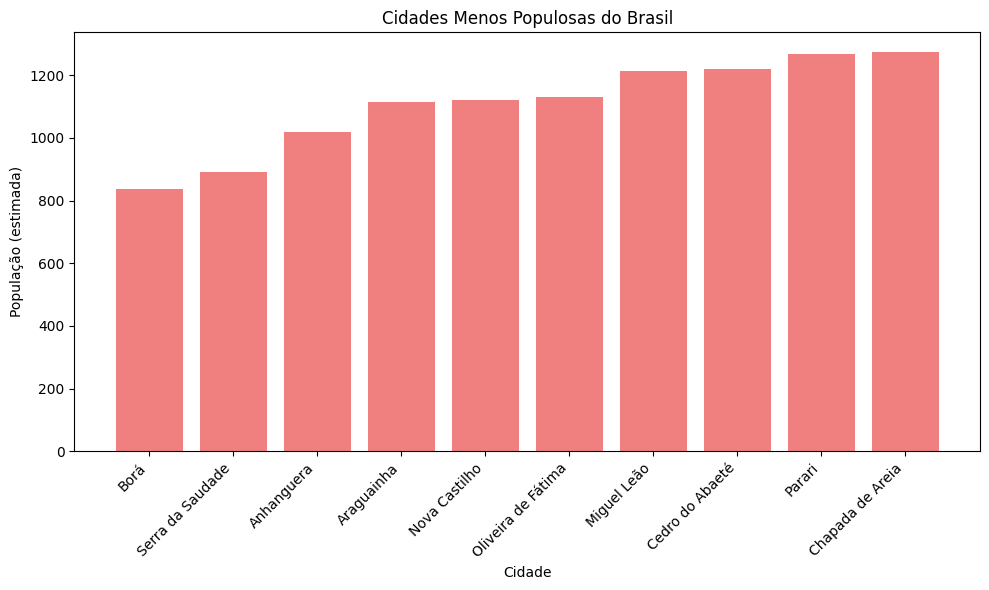

In [130]:
# Importando o pacote matplotlib
import matplotlib.pyplot as plt

# Construindo o gráfico
plt.figure(figsize = (10, 6))
plt.bar(cidades_menos_populosas['nome'], cidades_menos_populosas['Pop_est_2009'], color = 'lightcoral')
plt.title('Cidades Menos Populosas do Brasil')
plt.xlabel('Cidade')
plt.ylabel('População (estimada)')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

## 3.2 - Proporção da população do Brasil por região

In [131]:
# População por região
populacao_por_regiao = df_brasil.groupby('regiao')['Pop_est_2009'].sum()
populacao_por_regiao

,Pop_est_2009
regiao,
CENTRO-OESTE,13773930
NORDESTE,53491940
NORTE,15359608
SUDESTE,80831550
SUL,27719118


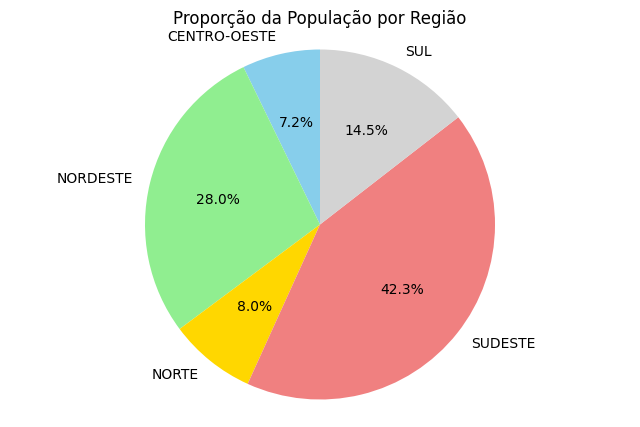

In [134]:
# Gerando o gráfico de Pizza
plt.figure(figsize=(8,5))
plt.pie(populacao_por_regiao, labels = populacao_por_regiao.index, autopct = '%1.1f%%', startangle = 90, colors=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'lightgray'])
plt.title('Proporção da População por Região')
plt.axis('equal')
plt.show()